In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
app_data=pd.read_csv(r"C:\Users\DELL\Downloads\apps.csv (1)\apps.csv")
app_data.head()


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
app_data.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [4]:
app_data.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


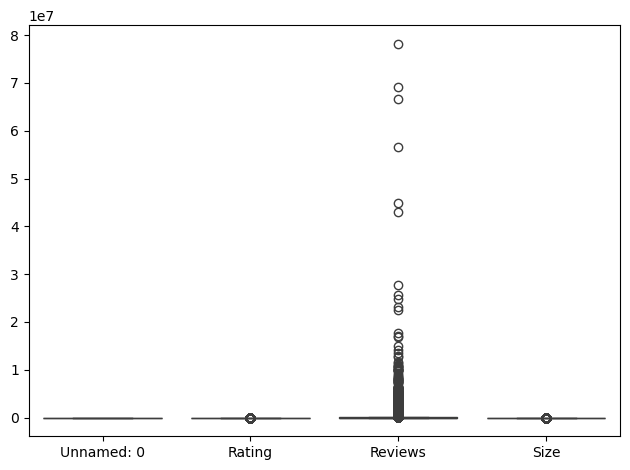

In [5]:
sns.boxplot(app_data)
plt.tight_layout()
plt.show()

In [6]:
chars_remove=['+',',','$']
cols_clean=['Installs','Price']
for col in cols_clean:
    for char in chars_remove:
        app_data[col]=app_data[col].astype(str).str.replace(char,'')
    app_data[col]=pd.to_numeric(app_data[col])

In [7]:
app_data[['Rating','Size']]=app_data[['Rating','Size']].fillna(np.mean(app_data['Rating']))

In [8]:
app_data[['Current Ver','Android Ver']]=app_data[['Current Ver','Android Ver']].fillna('NaN')

In [9]:
app_data.isnull().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Exploring app categories

In [10]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [11]:
apps_in_category=app_data['Category'].value_counts().sort_values(ascending=False)

In [12]:
num_category=len(app_data['Category'].unique())
num_category

33

In [13]:
data=[go.Bar(x=apps_in_category.index,y=apps_in_category.values)]
plotly.offline.iplot(data)

Distribution of app ratings

In [14]:
app_data['Rating'].mean()

4.173243045387995

In [15]:
data1=[go.Histogram(x=app_data['Rating'])]
plotly.offline.iplot(data1)


Size and price of an app

In [16]:
apps_with_size_and_rating_present = app_data[(~app_data['Rating'].isnull()) & (~app_data['Size'].isnull())]

In [17]:
large_categories=app_data[['Size','Rating']].groupby(app_data['Category']).filter(lambda x:len(x)>=250).reset_index()

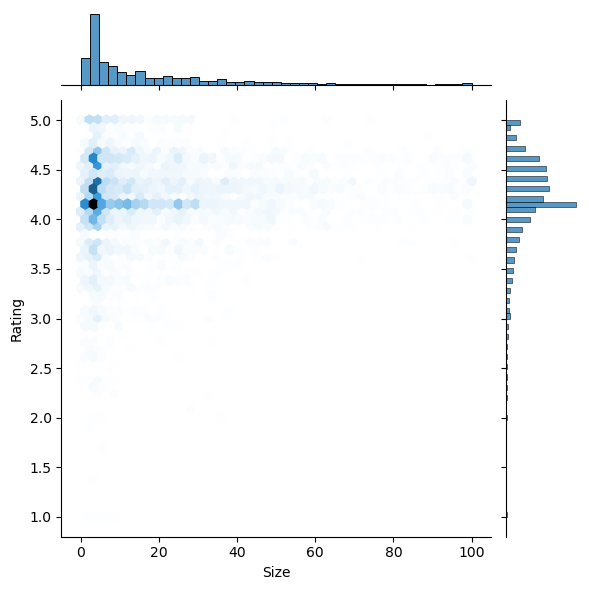

In [18]:
sns.jointplot(x=large_categories['Size'],y=large_categories['Rating'],kind='hex')
plt.show()

In [19]:
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

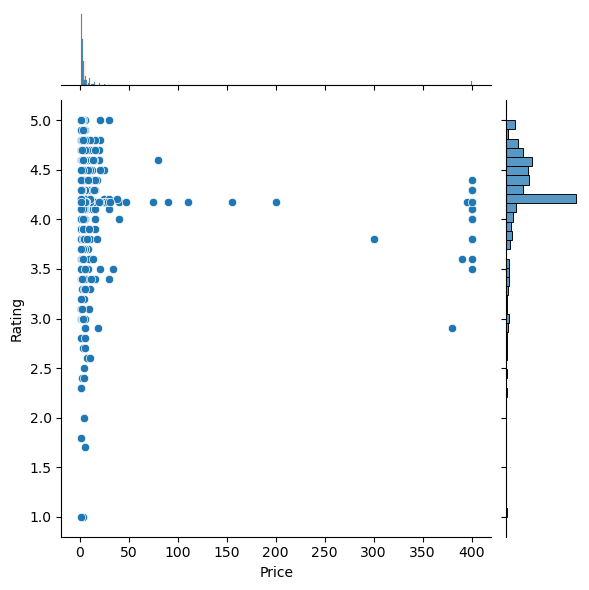

In [20]:
sns.jointplot(x=paid_apps['Price'],y=paid_apps['Rating'])

Relation between app category and app price

In [23]:
app_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [26]:
app_categories=app_data[app_data.Category.isin(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'])]

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


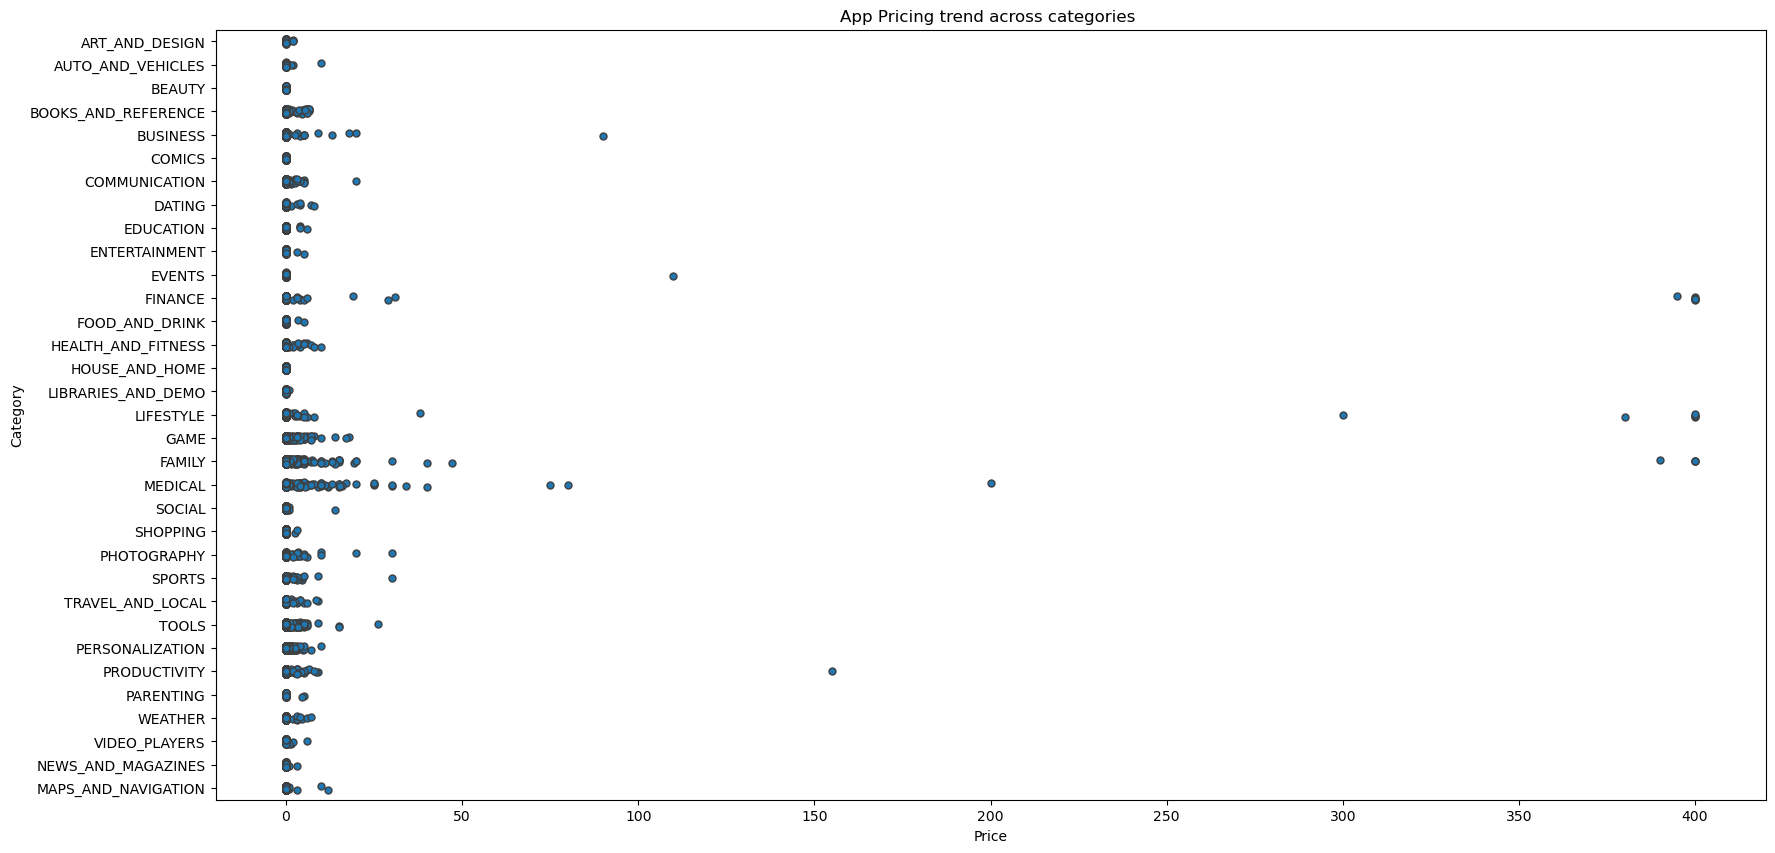

In [28]:
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
ax=sns.stripplot(x=app_categories['Price'],y=app_categories['Category'],jitter=True,linewidth=1)
apps_above_200=app_categories[['Category','App','Price']][app_categories['Price']>200]
ax.set_title("App Pricing trend across categories ")
apps_above_200

 Popularity of paid apps vs free apps

In [29]:
plot1=go.Box(
    y=app_data[app_data['Type']=='Paid']['Installs'],name='Paid'
)
plot2=go.Box(y=app_data[app_data['Type']=='Free']['Installs'],name='Free')


In [31]:
layout=go.Layout(title='Number of downloads of paid apps vs free apps',yaxis=dict(type='log',autorange=True))
data=[plot1,plot2]
plotly.offline.iplot({'data':data,'layout':layout})

Sentiment analysis of user reviews

In [32]:
reviews_data=pd.read_csv(r"C:\Users\DELL\Downloads\user_reviews.csv (1)\user_reviews.csv")
reviews_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [37]:
merged_data=pd.merge(app_data,reviews_data,on="App",how='inner')

In [38]:
merged_data=merge_data.dropna(subset=['Sentiment','Translated_Review'])


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

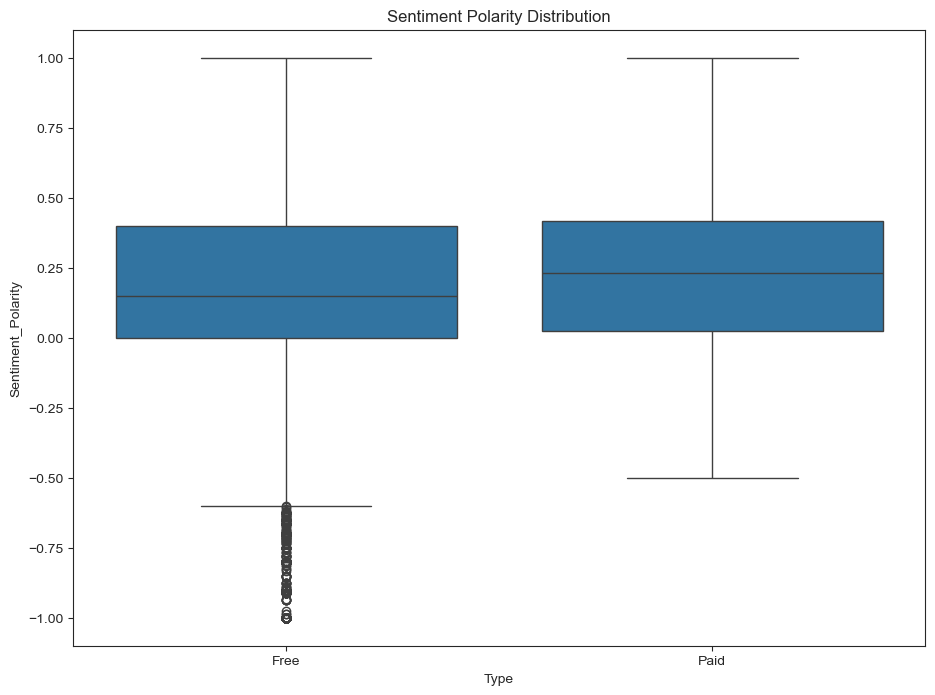

In [39]:
sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(11,8)
ax=sns.boxplot(x=merged_data['Type'],y=merged_data['Sentiment_Polarity'],data=merged_data)
ax.set_title("Sentiment Polarity Distribution")